In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print("keys of the dataset: {}".format(iris_dataset.keys()))

keys of the dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("Feature to Identify: {}".format(iris_dataset['feature_names']))

Feature to Identify: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Spieces to catagorize: {}".format(iris_dataset['target_names']))

Spieces to catagorize: ['setosa' 'versicolor' 'virginica']


In [8]:
print("target?: {}".format(iris_dataset['target']))

target?: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meanings of the numbers are given by the iris['target_names'] array:
0 means setosa, 1 means versicolor, and 2 means virginica.

In [10]:
print("shape of data: {}".format(iris_dataset['data'].shape))

shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers. With 150 Rows and 4 collumns according to 4 Features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [15]:
print("last 5 data: \n{}".format(iris_dataset['data'][-5:]))

last 5 data: 
[[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


let us import a training set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state =0)

the train_test_split function. This function extracts 75% of the rows in the data as the
training set, together with the corresponding labels for this data. The remaining 25%
of the data, together with the remaining labels, is declared as the test set. Deciding
how much data you want to put into the training and the test set respectively is some‐
what arbitrary, but using a test set containing 25% of the data is a good rule of thumb. random_state is for us to fix the pseudorandomess to ensure the output is in coherence with the book.

In [33]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Before building a machine learning model it is often a good idea to inspect the data,to see if the task is easily solvable without machine learning, or if the desired infor‐mation might not be contained in the data.

One of the best ways to inspect data is to visualize it. One way to do this is by using a scatter plot. 

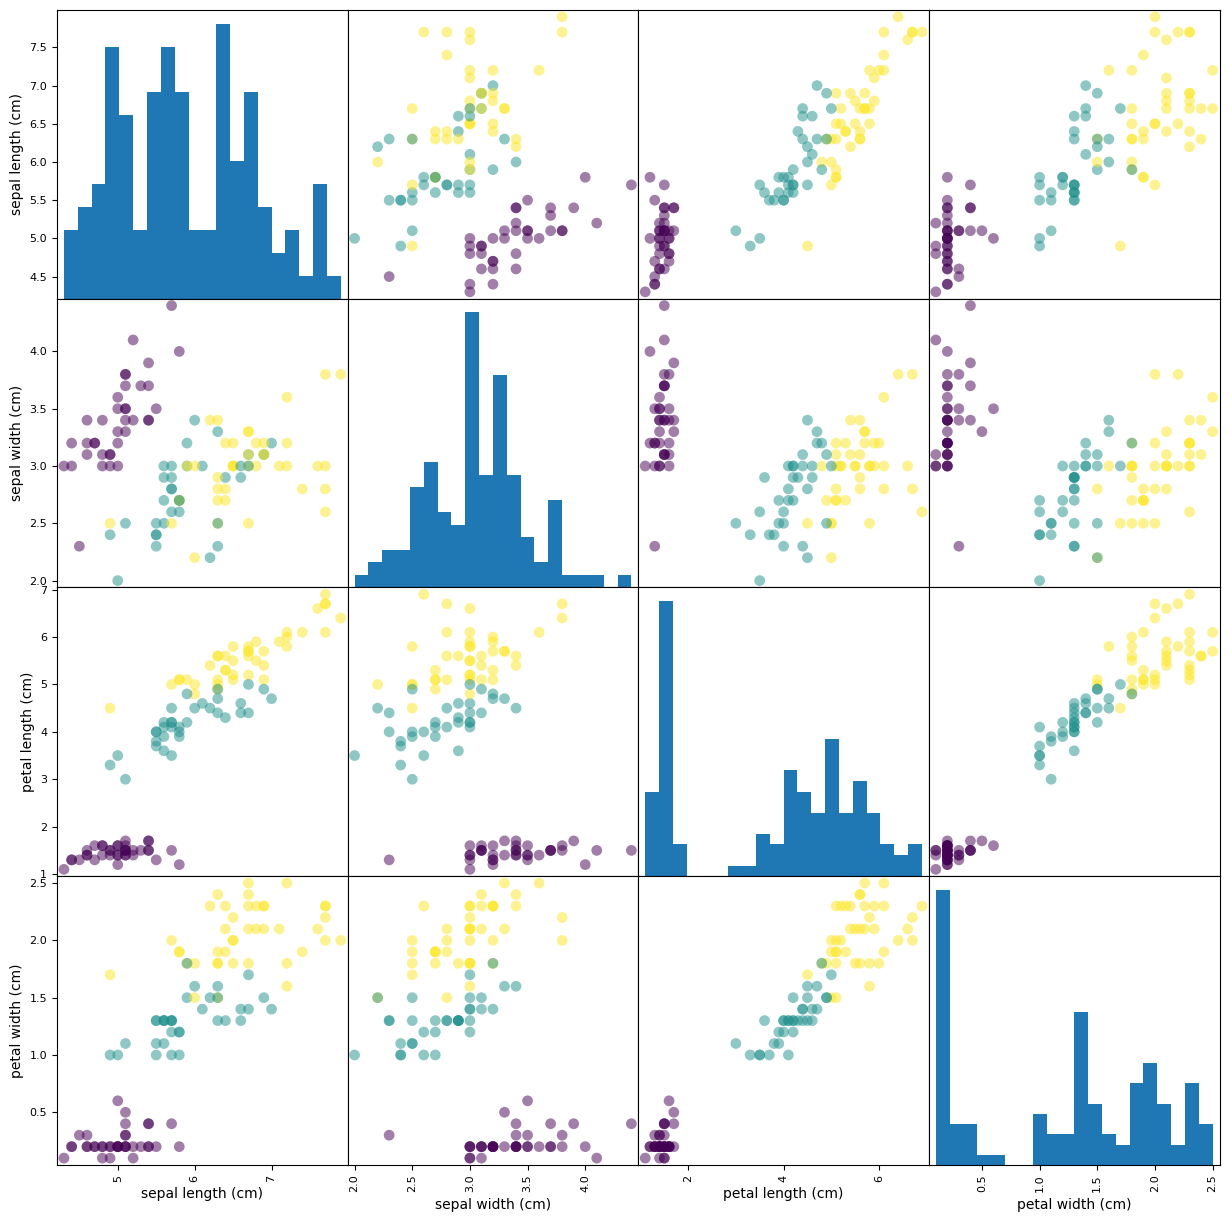

In [35]:
#create dataframe using data in X_train
#label the columns using strngs in irisdataset.featurenames
import pandas as pd
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)
#create a scatter matrix from the dataframe, color by y_train

grr= pd.plotting.scatter_matrix(iris_dataframe, 
                                c=y_train, 
                                figsize=(15,15), 
                                marker='o', 
                                hist_kwds={'bins':20},
                                s=60, alpha=.5)

From the plots, we can see that the three classes seem to be relatively well separated
using the sepal and petal measurements. This means that a machine learning model
will likely be able to learn to separate them.


**Building Your First Model: k-Nearest Neighbors**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

**Predicting and evaluating model**

Example if we found a irisis with with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be?

```python
#create a numpy array holding the value according to our model data
X_new = np.array([[5, 2.9, 1, 0.2]])
#our Knn numpy object has a property of predict()
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
 iris_dataset['target_names'][prediction]))

```

In [38]:
y_prediction =  knn.predict(X_test)
print(f"our prediction to X_test: \n {y_prediction}")
print(f"predicting target names:\n {iris_dataset['target_names'][y_prediction]}")

our prediction to X_test: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
predicting target names:
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [45]:
#check if we are correct
import numpy as np
score = np.mean(y_prediction == y_test)
print("our test score {:.2f}".format(score))


our test score 0.97
